<a href="https://colab.research.google.com/github/sampath11/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Sam_Kumar_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
### YOUR CODE STARTS HERE
import pandas as pd
import numpy as num

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [57]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

--2019-10-08 00:10:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2019-10-08 00:10:23 (443 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [58]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names"

--2019-10-08 00:10:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6868 (6.7K) [application/x-httpd-php]
Saving to: ‘house-votes-84.names.1’

house-votes-84.name 100%[===================>]   6.71K  --.-KB/s    in 0s      

2019-10-08 00:10:26 (166 MB/s) - ‘house-votes-84.names.1’ saved [6868/6868]



In [59]:
!head -20 house-votes-84.names

1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

3. Past Usage
   - Publications
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
     - Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
      This data set includes votes for each of the U.S. House of
      Representatives Congressmen on the 16 key votes identified by the


In [60]:
!head house-votes-84.data

republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [61]:
header_names = ["Party", 
 	"handicapped-infants",
 	 "water-project-cost-sharing",
	"adoption-of-the-budget-resolutionAlcalinity of ash",
 	"physician-fee-freeze",
	"el-salvador-aid",
  "religious-groups-in-schools",
 	"anti-satellite-test-ban",
 	"aid-to-nicaraguan-contras",
	"mx-missile",
 	"immigration",
  "synfuels-corporation-cutback",
 	"education-spending"
   "superfund-right-to-sue",
   "crime",
   "duty-free-exports",
   "export-administration-act-south-africa"
    ]

## header=None, names=cols, na_values='?')
df = pd.read_csv ("house-votes-84.data", names=header_names, header=None, index_col=False, na_values='?')

df.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y


In [0]:
## Replace n, y 

df = df.replace({"n":0, "y":int('1')})

In [68]:
df.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0


In [69]:
#filter party

df_dems = df[(df.Party =="democrat")]

df_dems.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0


In [70]:
df_rep = df[df.Party == "republican"]

df_rep.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0


In [71]:
df_dems.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
## Lets pick up issue - physician-fee-freeze

df_dems['physician-fee-freeze'].head()

2    NaN
3    0.0
4    0.0
5    0.0
6    1.0
Name: physician-fee-freeze, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


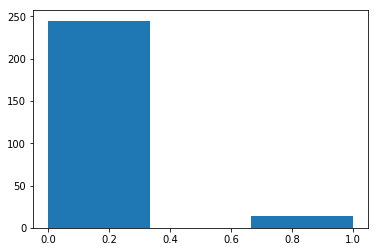

In [73]:
import matplotlib.pyplot as plt

plt.hist(df_dems['physician-fee-freeze'], bins=3);

In [75]:
## Now pick, same issue and see Rep values



df_rep['physician-fee-freeze'].head()

0     1.0
1     1.0
7     1.0
8     1.0
10    1.0
Name: physician-fee-freeze, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


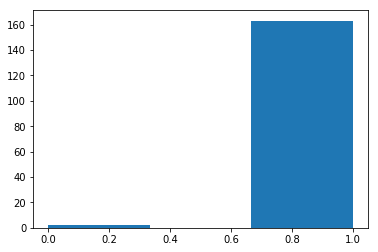

In [76]:
## Plot and see value

plt.hist(df_rep['physician-fee-freeze'], bins=3);

In [78]:
#Framing null hypothesis for Physician fee freeze.

#NULL HYPOTHESES: As a group,Rep support the Physician fee freeze issue more than Dems

# NOTE - I am making a big ASSUMPTION that these are independent variables, and have normal dist, and there is no need for me 
# to get the mean for these samples 
  
ttest_ind (df_dems['physician-fee-freeze'], df_rep['physician-fee-freeze'], nan_policy='omit', equal_var=False)
  
  

Ttest_indResult(statistic=-56.70480591963001, pvalue=8.82076091455592e-193)

## As you can see above, the p_value is very small, small than 0.01, so we support the null hypothesis that Rep  support the Physician Fee Freeze issue more than Dems. 

In [81]:
## Lets look at another issue - Handicappped infants

df_dems['handicapped-infants'].head(20)

2     NaN
3     0.0
4     1.0
5     0.0
6     0.0
9     1.0
12    0.0
13    1.0
16    1.0
17    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
29    1.0
Name: handicapped-infants, dtype: float64

In [82]:
df_rep['handicapped-infants'].head(20)

0     0.0
1     0.0
7     0.0
8     0.0
10    0.0
11    0.0
14    0.0
15    0.0
18    0.0
28    1.0
30    0.0
33    0.0
35    0.0
36    1.0
37    1.0
38    0.0
49    0.0
51    0.0
53    1.0
55    0.0
Name: handicapped-infants, dtype: float64

In [84]:
#Framing null hypothesis for Handicapped Infants

#NULL HYPOTHESES: As a group,Dems support the Handicapped Infants issue more than Rep

# NOTE - I am making a big ASSUMPTION that these are independent variables, and have normal dist, and there is no need for me 
# to get the mean for these samples 
  
ttest_ind (df_dems['handicapped-infants'], df_rep['handicapped-infants'], nan_policy='omit', equal_var=False)
  
  

Ttest_indResult(statistic=9.662336936353906, pvalue=5.429018745046274e-20)

#As you can see above, the p_value is very small, small than 0.01, so we support the null hypothesis that Dems support the handicapped infants issue more than Rep

In [85]:
### Now lets look at an issue that both support equally

#water-project-cost-sharing

## Lets look at another issue - Handicappped infants

df_dems['water-project-cost-sharing'].head(20)

2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
9     1.0
12    1.0
13    1.0
16    0.0
17    NaN
19    1.0
20    1.0
21    1.0
22    NaN
23    1.0
24    0.0
25    0.0
26    0.0
27    1.0
29    1.0
Name: water-project-cost-sharing, dtype: float64

In [86]:
df_rep['water-project-cost-sharing'].head(20)

0     1.0
1     1.0
7     1.0
8     1.0
10    1.0
11    1.0
14    1.0
15    1.0
18    1.0
28    0.0
30    1.0
33    1.0
35    1.0
36    NaN
37    1.0
38    1.0
49    NaN
51    1.0
53    1.0
55    1.0
Name: water-project-cost-sharing, dtype: float64

In [87]:
#Framing null hypothesis for Water-project-cost-sharing

#NULL HYPOTHESES: As a group,Dems support the Water-project-cost-sharing issue more than Rep

# NOTE - I am making a big ASSUMPTION that these are independent variables, and have normal dist, and there is no need for me 
# to get the mean for these samples 
  
ttest_ind (df_dems['water-project-cost-sharing'], df_rep['water-project-cost-sharing'], nan_policy='omit', equal_var=False)
  
  

Ttest_indResult(statistic=-0.08893998898558053, pvalue=0.9291867875225105)

#As you can see above, the p_value is larger than 0.01, so we cannot support the null hypothesis that Dems support the water-project-cost-sharing issue more than Rep, so we reject null hypotheses